In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ASSETS_PATH = os.path.join(os.getcwd(), 'Assets')

In [2]:
def extract_zip_folder(zip_name:str) -> None:
    """Extracts a zip folder to a given path.
    
    Args:
        zip_folder_path (str): name of the zip folder.
    """
    zip_path = os.path.join(ASSETS_PATH, zip_name)
    zip = zipfile.ZipFile(file=zip_path, mode = 'r')
    zip.extractall(os.path.join(ASSETS_PATH))
    zip.close()

In [3]:
extract_zip_folder("homer_bart.zip")

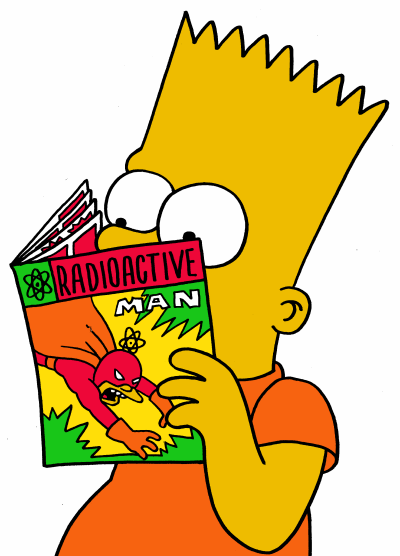

In [4]:
# Test if the images are extracted correctly

tf.keras.preprocessing.image.load_img(os.path.join(ASSETS_PATH, "homer_bart", "training_set", "bart", "bart29.bmp"))

In [5]:
# Objct to create image training sets.

training_generator = ImageDataGenerator(ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2))

# Classes are the folders in the training set.

training_dataset = training_generator.flow_from_directory(os.path.join(ASSETS_PATH, "homer_bart", "training_set"),
                                                              target_size = (64, 64),
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 215 images belonging to 2 classes.


In [6]:
# Test set. No need to apply transformations.

gerador_teste = ImageDataGenerator(rescale=1./255)
test_dataset = gerador_teste.flow_from_directory(os.path.join(ASSETS_PATH, "homer_bart", "test_set"),
                                                  target_size = (64,64),
                                                  batch_size = 8,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

Found 54 images belonging to 2 classes.


In [7]:
from keras.layers import Dropout

def compile_CNN_classifier() -> Sequential:
    """Defines the layers of the classifier and compiles it.
    
    returns: Sequential object with the classifier.
    """
    CNN_classifier = Sequential()

    # First convolutional layer
    CNN_classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)))
    CNN_classifier.add(MaxPool2D(pool_size=(2,2)))

    # Second convolutional layer
    CNN_classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    CNN_classifier.add(MaxPool2D(pool_size=(2,2)))

    # Third convolutional layer
    CNN_classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    CNN_classifier.add(MaxPool2D(pool_size=(2,2)))
    
    # Fourth convolutional layer
    CNN_classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    CNN_classifier.add(MaxPool2D(pool_size=(2,2)))

    # Flattening
    CNN_classifier.add(Flatten())

    # Fully connected layer
    CNN_classifier.add(Dense(units = 65, activation='relu'))
    CNN_classifier.add(Dense(units = 65, activation='relu'))

    # Output layer. Softmax calculates the probability of each neuron (class)
    CNN_classifier.add(Dense(units = 2, activation='softmax'))

    # Compiling the neural network
    CNN_classifier.summary()
    CNN_classifier.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return CNN_classifier

In [8]:
from os.path import exists
from keras.models import load_model
from keras.callbacks import EarlyStopping

def get_classifier() -> Sequential:
    """Loads the classifier if it exists, or creates and trains a new one.
    
    returns: Sequential object with the classifier.
    """
    if exists(os.path.join(ASSETS_PATH, 'classifier_model.h5')):
        classifier = load_model(os.path.join(ASSETS_PATH, 'classifier_model.h5'))
    else:
        classifier = compile_CNN_classifier()

        # Trains the classifier
        classifier.fit(training_dataset, epochs=50)
        
        # Saves the classifier
        classifier.save(os.path.join(ASSETS_PATH, "classifier_model.h5"))

    return classifier

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


27/27 [==============================] - 2s 50ms/step - loss: 3.1550 - accuracy: 0.5256
Epoch 2/50
27/27 [==============================] - 0s 17ms/step - loss: 1.0682 - accuracy: 0.6930
Epoch 3/50
27/27 [==============================] - 0s 17ms/step - loss: 0.7119 - accuracy: 0.6605
Epoch 4/50
27/27 [==============================] - 0s 16ms/step - loss: 0.5403 - accuracy: 0.7674
Epoch 5/50
27/27 [==============================] - 0s 16ms/step - loss: 0.3956 - accuracy: 0.8419
Epoch 6/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3174 - accuracy: 0.8558
Epoch 7/50
27/27 [==============================] - 0s 16ms/step - loss: 0.2402 - accuracy: 0.9163
Epoch 8/50
27/27 [==============================] - 0s 17ms/step - loss: 0.2052 - accuracy: 0.9349
Epoch 9/50
27/27 [==============================] - 0s 16ms/step - loss: 0.2101 - accuracy: 0.9023
Epoch 10/50
27/27 [==============================] - 0s 16ms/step - loss: 0.1760 - accuracy: 0.9302
Epoch 11/50
27/27 [=

<AxesSubplot: >

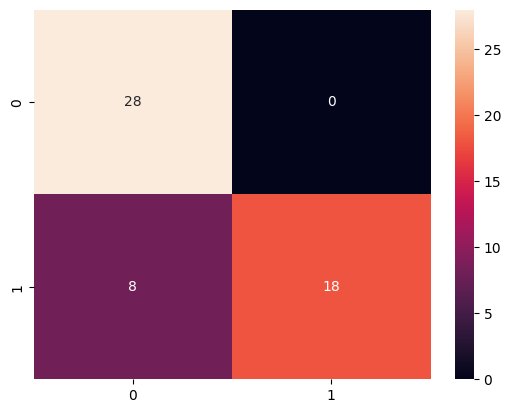

In [9]:
# Classifier evaluation

classifier = get_classifier()

predictions = classifier.predict(test_dataset)
print(predictions)
predictions = np.argmax(predictions, axis=1)

print(accuracy_score(test_dataset.classes, predictions))
cm = confusion_matrix(test_dataset.classes, predictions)
print(classification_report(test_dataset.classes, predictions))
sns.heatmap(cm, annot=True)



In [16]:
def classify_image(image_path:str, classifier:Sequential) -> str:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    image = image / 255
    image = image.reshape(-1, 64, 64, 3)

    prediction = classifier.predict(image)
    prediction = np.argmax(prediction, axis=1)

    if prediction == 0:
        print("The character in the image is",'Bart')
        return 'Bart'
    else:
        print("The character in the image is", 'Homer')
        return 'Homer'

1/1 [==============================] - 0s 25ms/step
The character in the image is Homer


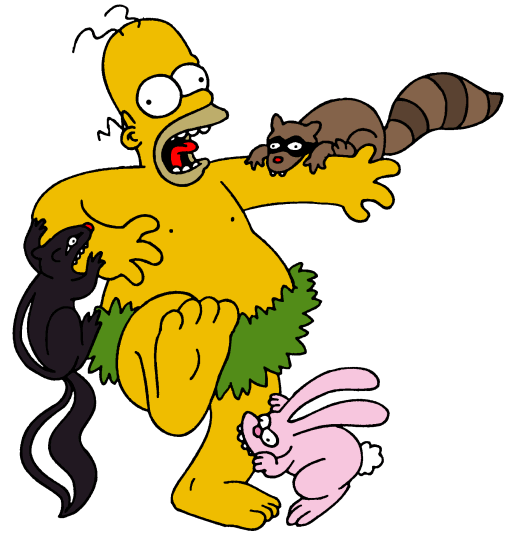

In [24]:
# Classifying a new image

image_1_path = os.path.join(ASSETS_PATH, "homer_bart", "test_set", "homer",'homer15.bmp')
image_1_class = classify_image(image_1_path, classifier)
                          
# Image classified correctly
tf.keras.preprocessing.image.load_img(image_1_path)

1/1 [==============================] - 0s 20ms/step
The character in the image is Bart


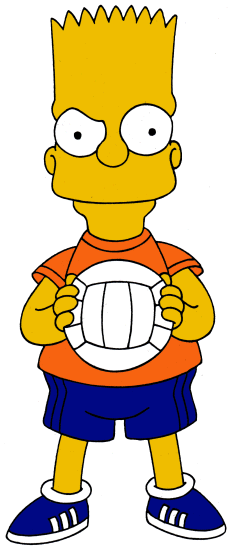

In [26]:
# Classifying a new image

image_2_path = os.path.join(ASSETS_PATH, "homer_bart", "test_set", "bart",'bart14.bmp')
image_2_class = classify_image(image_2_path, classifier)
                          
# Image classified correctly
tf.keras.preprocessing.image.load_img(image_2_path)